# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166
# This and the next statements are not necessary as I was working on Anaconda

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.12.0)


### Import Statements

In [87]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# These might be helpful:
from iso3166 import countries # this required installation via Anaconda prompt
from datetime import datetime, timedelta

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [4]:
# the file mission_launches.csv was included in the original assignment
# df_data = pd.read_csv('mission_launches.csv')
# the file mission_status_updated.csv is a result of scraping as of 18-Jul-2023 (see main.py for details)
df_data = pd.read_csv('mission_launches_updated.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_data.shape
# 4324 rows, 9 columns - original file
# 6562 rows, 8 columns - updated file

(6562, 8)

In [6]:
df_data.columns

Index(['Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail',
       'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [7]:
df_data.isna().sum()

Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             4046
Mission_Status       0
dtype: int64

In [8]:
df_data.head()

Unnamed: 0 Organisation                                           Location  \
0           0   Rocket Lab     Rocket Lab LC-1B, Māhia Peninsula, New Zealand   
1           1       SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
2           2         ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
3           3    Landspace    Site 96, Jiuquan Satellite Launch Center, China   
4           4       SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   

                         Date                                  Detail  \
0  Tue Jul 18, 2023 01:27 UTC         Electron/Curie | Baby Come Back   
1  Sun Jul 16, 2023 03:50 UTC  Falcon 9 Block 5 | Starlink Group 5-15   
2  Fri Jul 14, 2023 09:05 UTC                   LVM-3 | Chandrayaan-3   
3  Wed Jul 12, 2023 01:00 UTC                     ZhuQue-2 | Flight 2   
4  Mon Jul 10, 2023 03:58 UTC   Falcon 9 Block 5 | Starlink Group 6-5   

  Rocket_Status  Price Mission_Status  
0        Active   7.50        Success  
1        Active  67.00        Success  
2        Active  62.00        Success  
3        Active    NaN        Success  
4        Active  67.00        Success

In [9]:
df_data.tail()

Unnamed: 0 Organisation                                   Location  \
6557        6557      US Navy   LC-18A, Cape Canaveral SFS, Florida, USA   
6558        6558         ABMA   LC-26A, Cape Canaveral SFS, Florida, USA   
6559        6559      US Navy   LC-18A, Cape Canaveral SFS, Florida, USA   
6560        6560    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
6561        6561    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date                      Detail Rocket_Status  \
6557  Wed Feb 05, 1958 07:33 UTC   Vanguard | Vanguard TV3BU       Retired   
6558  Sat Feb 01, 1958 03:47 UTC         Juno I | Explorer 1       Retired   
6559  Fri Dec 06, 1957 16:44 UTC     Vanguard | Vanguard TV3       Retired   
6560  Sun Nov 03, 1957 02:30 UTC  Sputnik 8K71PS | Sputnik 2       Retired   
6561  Fri Oct 04, 1957 19:28 UTC  Sputnik 8K71PS | Sputnik 1       Retired   

      Price Mission_Status  
6557    NaN        Failure  
6558    NaN        Success  
6559    NaN        Failure  
6560    NaN        Success  
6561    NaN        Success

In [41]:
df_data.dtypes

Organisation       object
Location           object
Date               object
Detail             object
Rocket_Status      object
Price             float64
Mission_Status     object
Country            object
dtype: object

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [10]:
# df_data = df_data.drop(['Unnamed: 0.1'], axis=1) # this was necessary for the original but not the updated file
df_data = df_data.drop(['Unnamed: 0'], axis=1)
df_data

Organisation                                           Location  \
0      Rocket Lab     Rocket Lab LC-1B, Māhia Peninsula, New Zealand   
1          SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
2            ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
3       Landspace    Site 96, Jiuquan Satellite Launch Center, China   
4          SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
...           ...                                                ...   
6557      US Navy           LC-18A, Cape Canaveral SFS, Florida, USA   
6558         ABMA           LC-26A, Cape Canaveral SFS, Florida, USA   
6559      US Navy           LC-18A, Cape Canaveral SFS, Florida, USA   
6560    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
6561    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date                                  Detail  \
0     Tue Jul 18, 2023 01:27 UTC         Electron/Curie | Baby Come Back   
1     Sun Jul 16, 2023 03:50 UTC  Falcon 9 Block 5 | Starlink Group 5-15   
2     Fri Jul 14, 2023 09:05 UTC                   LVM-3 | Chandrayaan-3   
3     Wed Jul 12, 2023 01:00 UTC                     ZhuQue-2 | Flight 2   
4     Mon Jul 10, 2023 03:58 UTC   Falcon 9 Block 5 | Starlink Group 6-5   
...                          ...                                     ...   
6557  Wed Feb 05, 1958 07:33 UTC               Vanguard | Vanguard TV3BU   
6558  Sat Feb 01, 1958 03:47 UTC                     Juno I | Explorer 1   
6559  Fri Dec 06, 1957 16:44 UTC                 Vanguard | Vanguard TV3   
6560  Sun Nov 03, 1957 02:30 UTC              Sputnik 8K71PS | Sputnik 2   
6561  Fri Oct 04, 1957 19:28 UTC              Sputnik 8K71PS | Sputnik 1   

     Rocket_Status  Price Mission_Status  
0           Active   7.50        Success  
1           Active  67.00        Success  
2           Active  62.00        Success  
3           Active    NaN        Success  
4           Active  67.00        Success  
...            ...    ...            ...  
6557       Retired    NaN        Failure  
6558       Retired    NaN        Success  
6559       Retired    NaN        Failure  
6560       Retired    NaN        Success  
6561       Retired    NaN        Success  

[6562 rows x 7 columns]

In [11]:
df_data[df_data.duplicated()]
# there was one duplicate in the original file and no duplicates in the updated file

Empty DataFrame
Columns: [Organisation, Location, Date, Detail, Rocket_Status, Price, Mission_Status]
Index: []

In [12]:
df_data.drop_duplicates(inplace=True)
df_data.reset_index(drop=True)
df_data

Organisation                                           Location  \
0      Rocket Lab     Rocket Lab LC-1B, Māhia Peninsula, New Zealand   
1          SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
2            ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
3       Landspace    Site 96, Jiuquan Satellite Launch Center, China   
4          SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
...           ...                                                ...   
6557      US Navy           LC-18A, Cape Canaveral SFS, Florida, USA   
6558         ABMA           LC-26A, Cape Canaveral SFS, Florida, USA   
6559      US Navy           LC-18A, Cape Canaveral SFS, Florida, USA   
6560    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
6561    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date                                  Detail  \
0     Tue Jul 18, 2023 01:27 UTC         Electron/Curie | Baby Come Back   
1     Sun Jul 16, 2023 03:50 UTC  Falcon 9 Block 5 | Starlink Group 5-15   
2     Fri Jul 14, 2023 09:05 UTC                   LVM-3 | Chandrayaan-3   
3     Wed Jul 12, 2023 01:00 UTC                     ZhuQue-2 | Flight 2   
4     Mon Jul 10, 2023 03:58 UTC   Falcon 9 Block 5 | Starlink Group 6-5   
...                          ...                                     ...   
6557  Wed Feb 05, 1958 07:33 UTC               Vanguard | Vanguard TV3BU   
6558  Sat Feb 01, 1958 03:47 UTC                     Juno I | Explorer 1   
6559  Fri Dec 06, 1957 16:44 UTC                 Vanguard | Vanguard TV3   
6560  Sun Nov 03, 1957 02:30 UTC              Sputnik 8K71PS | Sputnik 2   
6561  Fri Oct 04, 1957 19:28 UTC              Sputnik 8K71PS | Sputnik 1   

     Rocket_Status  Price Mission_Status  
0           Active   7.50        Success  
1           Active  67.00        Success  
2           Active  62.00        Success  
3           Active    NaN        Success  
4           Active  67.00        Success  
...            ...    ...            ...  
6557       Retired    NaN        Failure  
6558       Retired    NaN        Success  
6559       Retired    NaN        Failure  
6560       Retired    NaN        Success  
6561       Retired    NaN        Success  

[6562 rows x 7 columns]

## Descriptive Statistics

In [13]:
df_data.describe()

Price
count 2,516.00
mean     70.16
std     103.55
min       2.50
25%      20.00
50%      29.75
75%      67.00
max     876.00

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [115]:
df_org = df_data[['Organisation', 'Location']].groupby(['Organisation']).count()
df_org = df_org.rename(columns={'Location': 'Org_count'})
df_org = df_org.sort_values(by="Org_count", ascending=False)
df_org.head(10)

Org_count
Organisation               
RVSN USSR              2476
US Air Force            549
CASC                    491
Roscosmos               358
VKS RF                  336
Arianespace             296
SpaceX                  257
General Dynamics        251
NASA                    222
ULA                     156

<BarContainer object of 64 artists>

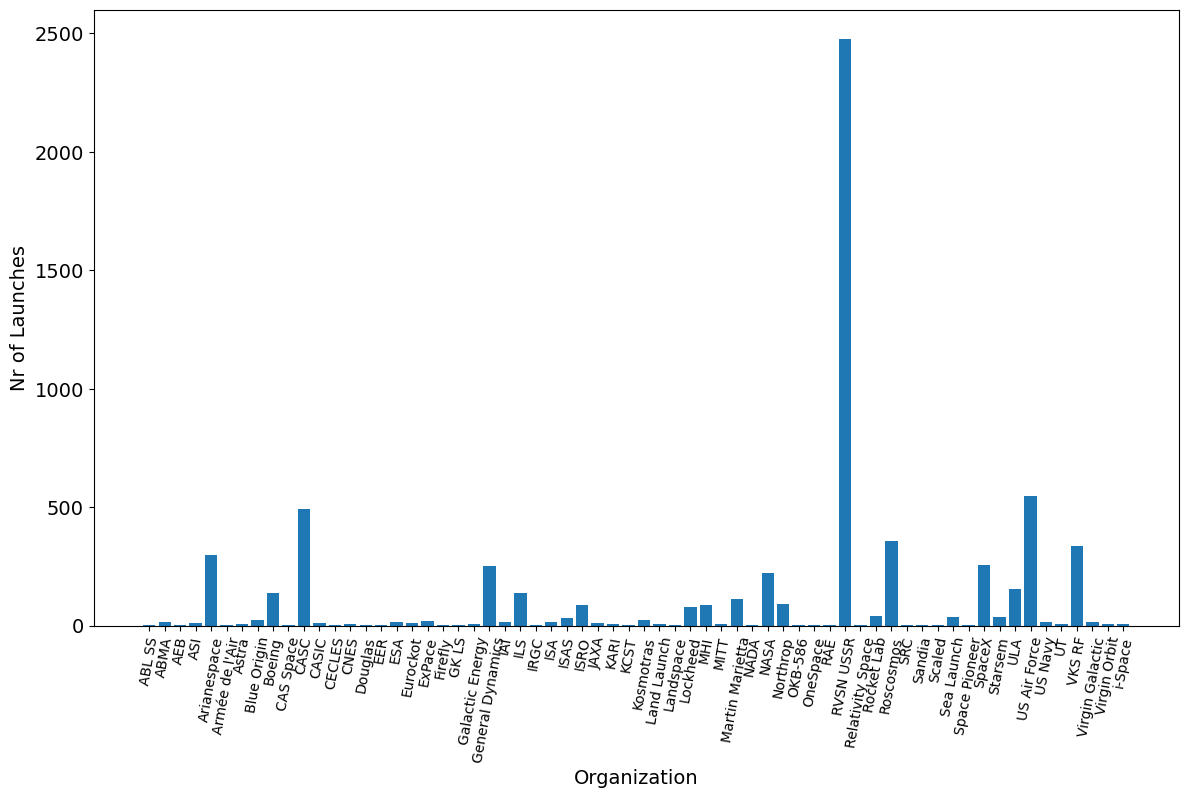

In [15]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=14)
plt.ylabel("Nr of Launches", fontsize=14)
plt.xlabel("Organization", fontsize=14)
plt.bar(df_org.index, df_org['Org_count'])

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [16]:
df_data.value_counts("Rocket_Status")
# this is the method taught during the course

Rocket_Status
Retired    5225
Active     1337
dtype: int64

In [17]:
pd.pivot_table(df_data, values='Organisation', index='Detail', columns=['Rocket_Status'], aggfunc='count', margins=True)
# this is an alternative methods. It's more cumbersome for this specific task but more versatile and will be used later 

Rocket_Status              Active  Retired   All
Detail                                          
ASLV | SROSS C                NaN     1.00     1
ASLV | SROSS C2               NaN     1.00     1
ASLV | SROSS-A                NaN     1.00     1
ASLV | SROSS-B                NaN     1.00     1
Angara 1.2 | Cosmos 2555     1.00      NaN     1
...                           ...      ...   ...
ZhuQue-1 | Weilai 1           NaN     1.00     1
ZhuQue-2 | Demo Flight       1.00      NaN     1
ZhuQue-2 | Flight 2          1.00      NaN     1
Zoljanah | Demo Flight       2.00      NaN     2
All                      1,337.00 5,225.00  6562

[6507 rows x 3 columns]

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [18]:
mstatus = df_data.value_counts("Mission_Status")
mstatus

Mission_Status
Success              5991
Failure               451
Partial Failure       112
Prelaunch Failure       8
dtype: int64

In [19]:
print(f"Ratio of successful missions is {mstatus['Success']/mstatus.sum():.3}")

Ratio of successful missions is 0.913


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [95]:
df_price = df_data.dropna(subset=['Price'])

In [21]:
fig = px.histogram(df_price, 
                   x="Price",
                   title="Launch Price Distribution",
                   color_discrete_sequence=['indianred'],
#                    log_y=True
                  )
fig.update_layout(xaxis_title='Launch Price', yaxis_title='# of Launches', coloraxis_showscale=False)
fig.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [22]:
# This block converts the country names to 3 leter numerical code
# Pacific Ocean was assumed to be Russia as Zenith rockets were launched from it
country_coder = {"Russia": "Russian Federation",
                 "New Mexico": "United States of America",
                 "Yellow Sea": "China",
                 # "Shahrud Missile Test Site": "Iran",
                 "Pacific Missile Range Facility": "United States of America",
                 "Barents Sea": "Russian Federation",
                 "Gran Canaria": "United States of America",
                 "Pacific Ocean": "Russian Federation",
                 "USA": "United States of America",
                 'North Korea': "Korea, Democratic People's Republic of",
                 'South Korea': "Korea, Republic of",
                 'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
                 "Iran": "Iran, Islamic Republic of"
                 }

country_dict = {c.name: c.alpha3 for c in countries}

def country_code(row):
    country = row["Location"].split(", ")[-1]
    if country in country_coder:
        country = country_coder[country]
    
    return country_dict[country]

df_data["Country"] = df_data.apply(lambda row: country_code(row), axis=1)
df_data.head()
# set(df_data["Country"])

Organisation                                           Location  \
0   Rocket Lab     Rocket Lab LC-1B, Māhia Peninsula, New Zealand   
1       SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
2         ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
3    Landspace    Site 96, Jiuquan Satellite Launch Center, China   
4       SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   

                         Date                                  Detail  \
0  Tue Jul 18, 2023 01:27 UTC         Electron/Curie | Baby Come Back   
1  Sun Jul 16, 2023 03:50 UTC  Falcon 9 Block 5 | Starlink Group 5-15   
2  Fri Jul 14, 2023 09:05 UTC                   LVM-3 | Chandrayaan-3   
3  Wed Jul 12, 2023 01:00 UTC                     ZhuQue-2 | Flight 2   
4  Mon Jul 10, 2023 03:58 UTC   Falcon 9 Block 5 | Starlink Group 6-5   

  Rocket_Status  Price Mission_Status Country  
0        Active   7.50        Success     NZL  
1        Active  67.00        Success     USA  
2        Active  62.00        Success     IND  
3        Active    NaN        Success     CHN  
4        Active  67.00        Success     USA

In [44]:
df_data.tail()

Organisation                                   Location  \
6557      US Navy   LC-18A, Cape Canaveral SFS, Florida, USA   
6558         ABMA   LC-26A, Cape Canaveral SFS, Florida, USA   
6559      US Navy   LC-18A, Cape Canaveral SFS, Florida, USA   
6560    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
6561    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date                      Detail Rocket_Status  \
6557  Wed Feb 05, 1958 07:33 UTC   Vanguard | Vanguard TV3BU       Retired   
6558  Sat Feb 01, 1958 03:47 UTC         Juno I | Explorer 1       Retired   
6559  Fri Dec 06, 1957 16:44 UTC     Vanguard | Vanguard TV3       Retired   
6560  Sun Nov 03, 1957 02:30 UTC  Sputnik 8K71PS | Sputnik 2       Retired   
6561  Fri Oct 04, 1957 19:28 UTC  Sputnik 8K71PS | Sputnik 1       Retired   

      Price Mission_Status Country  
6557    NaN        Failure     USA  
6558    NaN        Success     USA  
6559    NaN        Failure     USA  
6560    NaN        Success     KAZ  
6561    NaN        Success     KAZ

In [23]:
df_countries = df_data.groupby(["Country"], as_index=False).agg({"Detail": pd.Series.count})
df_countries

Country  Detail
0      AUS       6
1      BRA       3
2      CHN     536
3      FRA     323
4      GBR       1
5      IND      89
6      IRN      17
7      ISR      14
8      JPN     130
9      KAZ    1549
10     KEN       9
11     KOR       6
12     MHL       9
13     NZL      36
14     PRK       6
15     RUS    1845
16     USA    1983

In [24]:
world_map = px.choropleth(df_countries,
                          locations='Country',
                          color='Detail', 
                          hover_name='Country', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True)
 
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [25]:
# The dataframe below shows the number of failures (for all types of failures)
df_failures = df_data[df_data["Mission_Status"] != "Success"].groupby(["Country"], as_index=False).agg({"Detail": pd.Series.count})
df_failures

Country  Detail
0      AUS       4
1      BRA       3
2      CHN      36
3      FRA      20
4      GBR       1
5      IND      15
6      IRN       9
7      ISR       4
8      JPN      15
9      KAZ     136
10     KOR       3
11     MHL       3
12     NZL       3
13     PRK       4
14     RUS     109
15     USA     206

In [26]:
df_failuresp = pd.pivot_table(df_data, values='Organisation', index='Country', columns=['Mission_Status'], aggfunc='count')
df_failuresp.fillna(value=0, inplace=True)
df_failuresp

Mission_Status  Failure  Partial Failure  Prelaunch Failure  Success
Country                                                             
AUS                4.00             0.00               0.00     2.00
BRA                2.00             0.00               1.00     0.00
CHN               27.00             9.00               0.00   500.00
FRA               15.00             5.00               0.00   303.00
GBR                1.00             0.00               0.00     0.00
IND               10.00             5.00               0.00    74.00
IRN                8.00             0.00               1.00     8.00
ISR                4.00             0.00               0.00    10.00
JPN               13.00             2.00               0.00   115.00
KAZ              113.00            19.00               4.00 1,413.00
KEN                0.00             0.00               0.00     9.00
KOR                3.00             0.00               0.00     3.00
MHL                3.00             0.00               0.00     6.00
NZL                3.00             0.00               0.00    33.00
PRK                4.00             0.00               0.00     2.00
RUS               75.00            33.00               1.00 1,736.00
USA              166.00            39.00               1.00 1,777.00

In [27]:
# This code creates an additional column with the Failure rate that is used as a basis for the chart

def fail_rate(row):
    succ_rate = row["Success"] / (row["Success"] + row["Failure"] + row["Partial Failure"] + row["Prelaunch Failure"])
    
    return 1 - succ_rate

df_failuresp["Failure_Rate"] = df_failuresp.apply(lambda row: fail_rate(row), axis=1)

df_failuresp

Mission_Status  Failure  Partial Failure  Prelaunch Failure  Success  \
Country                                                                
AUS                4.00             0.00               0.00     2.00   
BRA                2.00             0.00               1.00     0.00   
CHN               27.00             9.00               0.00   500.00   
FRA               15.00             5.00               0.00   303.00   
GBR                1.00             0.00               0.00     0.00   
IND               10.00             5.00               0.00    74.00   
IRN                8.00             0.00               1.00     8.00   
ISR                4.00             0.00               0.00    10.00   
JPN               13.00             2.00               0.00   115.00   
KAZ              113.00            19.00               4.00 1,413.00   
KEN                0.00             0.00               0.00     9.00   
KOR                3.00             0.00               0.00     3.00   
MHL                3.00             0.00               0.00     6.00   
NZL                3.00             0.00               0.00    33.00   
PRK                4.00             0.00               0.00     2.00   
RUS               75.00            33.00               1.00 1,736.00   
USA              166.00            39.00               1.00 1,777.00   

Mission_Status  Failure_Rate  
Country                       
AUS                     0.67  
BRA                     1.00  
CHN                     0.07  
FRA                     0.06  
GBR                     1.00  
IND                     0.17  
IRN                     0.53  
ISR                     0.29  
JPN                     0.12  
KAZ                     0.09  
KEN                     0.00  
KOR                     0.50  
MHL                     0.33  
NZL                     0.08  
PRK                     0.67  
RUS                     0.06  
USA                     0.10

In [28]:
failure_map = px.choropleth(df_failuresp,
                            locations=df_failuresp.index,
                            color='Failure_Rate', 
                            hover_name=df_failuresp.index, 
                            color_continuous_scale=px.colors.sequential.Sunsetdark)
 
failure_map.update_layout(coloraxis_showscale=True)
 
failure_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [29]:
df_sunburst = df_data.groupby(by=["Country", "Organisation", "Mission_Status"], as_index=False).agg({"Detail": pd.Series.count})
df_sunburst

Country     Organisation   Mission_Status  Detail
0       AUS             ABMA          Success       1
1       AUS           CECLES          Failure       3
2       AUS              RAE          Failure       1
3       AUS              RAE          Success       1
4       BRA              AEB          Failure       2
..      ...              ...              ...     ...
149     USA  Virgin Galactic          Failure       1
150     USA  Virgin Galactic  Partial Failure       1
151     USA  Virgin Galactic          Success      13
152     USA     Virgin Orbit          Failure       1
153     USA     Virgin Orbit          Success       4

[154 rows x 4 columns]

In [30]:
burst = px.sunburst(df_sunburst, 
                    path=['Country', 'Organisation', 'Mission_Status'], 
                    values='Detail',
                    title='Mission Status',
                   )
 
burst.update_layout(xaxis_title='Number of missions', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [37]:
df_org_spend = df_data.groupby(["Organisation"], as_index=False).agg({"Price": pd.Series.sum})
df_org_spend.describe()

Price
count     64.00
mean   2,758.02
std    8,779.51
min        0.00
25%        0.00
50%       12.00
75%      658.00
max   62,076.00

In [32]:
# Huge variation in spending
# However, there are too many NaNs to make reasonable discussion regarding the spending

# Analyse the Amount of Money Spent by Organisation per Launch

In [40]:
# df_price is the dataframe from which the records with no prices were removed
# This is more suitable for analysis of money spent per launch
df_spend_launch = df_price.groupby(by=["Organisation"], as_index=False).agg({"Price": pd.Series.mean})
df_spend_launch
# Prices per launch are vastly different

Organisation  Price
0             ABL SS  12.00
1        Arianespace 141.98
2              Astra   2.50
3             Boeing 177.29
4               CASC  39.80
5              CASIC   5.80
6                EER  20.00
7                ESA  37.00
8           Eurockot  13.00
9             ExPace   8.30
10           Firefly  15.00
11             GK LS  23.00
12   Galactic Energy   4.90
13               ILS  71.01
14              ISRO  33.70
15              JAXA  49.20
16         Kosmotras  29.00
17          Lockheed  35.00
18               MHI  94.06
19   Martin Marietta  80.16
20              NASA 453.11
21          Northrop  49.28
22         RVSN USSR  21.61
23  Relativity Space  12.00
24        Rocket Lab   7.50
25         Roscosmos  30.57
26            Sandia  15.00
27            SpaceX  65.01
28           Starsem  25.64
29               ULA 155.84
30      US Air Force  59.65
31            VKS RF  22.22
32      Virgin Orbit  12.00

# Chart the Number of Launches per Year

In [50]:
# Converts the Date column into datetime 

def date_mod(row):
    date_temp = row["Date"].split()[:4]

    return datetime.strptime(" ".join(date_temp), "%a %b %d, %Y")

df_data["Date"] = df_data.apply(lambda row: date_mod(row), axis=1)

In [54]:
df_data["Year"] = df_data.apply(lambda row: (row["Date"].year), axis=1)

In [56]:
df_launches = df_data.groupby(by=["Year"], as_index=False).agg({"Location": pd.Series.count})
df_launches

Year  Location
0   1957         3
1   1958        28
2   1959        24
3   1960        41
4   1961        56
..   ...       ...
62  2019       107
63  2020       118
64  2021       157
65  2022       191
66  2023       110

[67 rows x 2 columns]

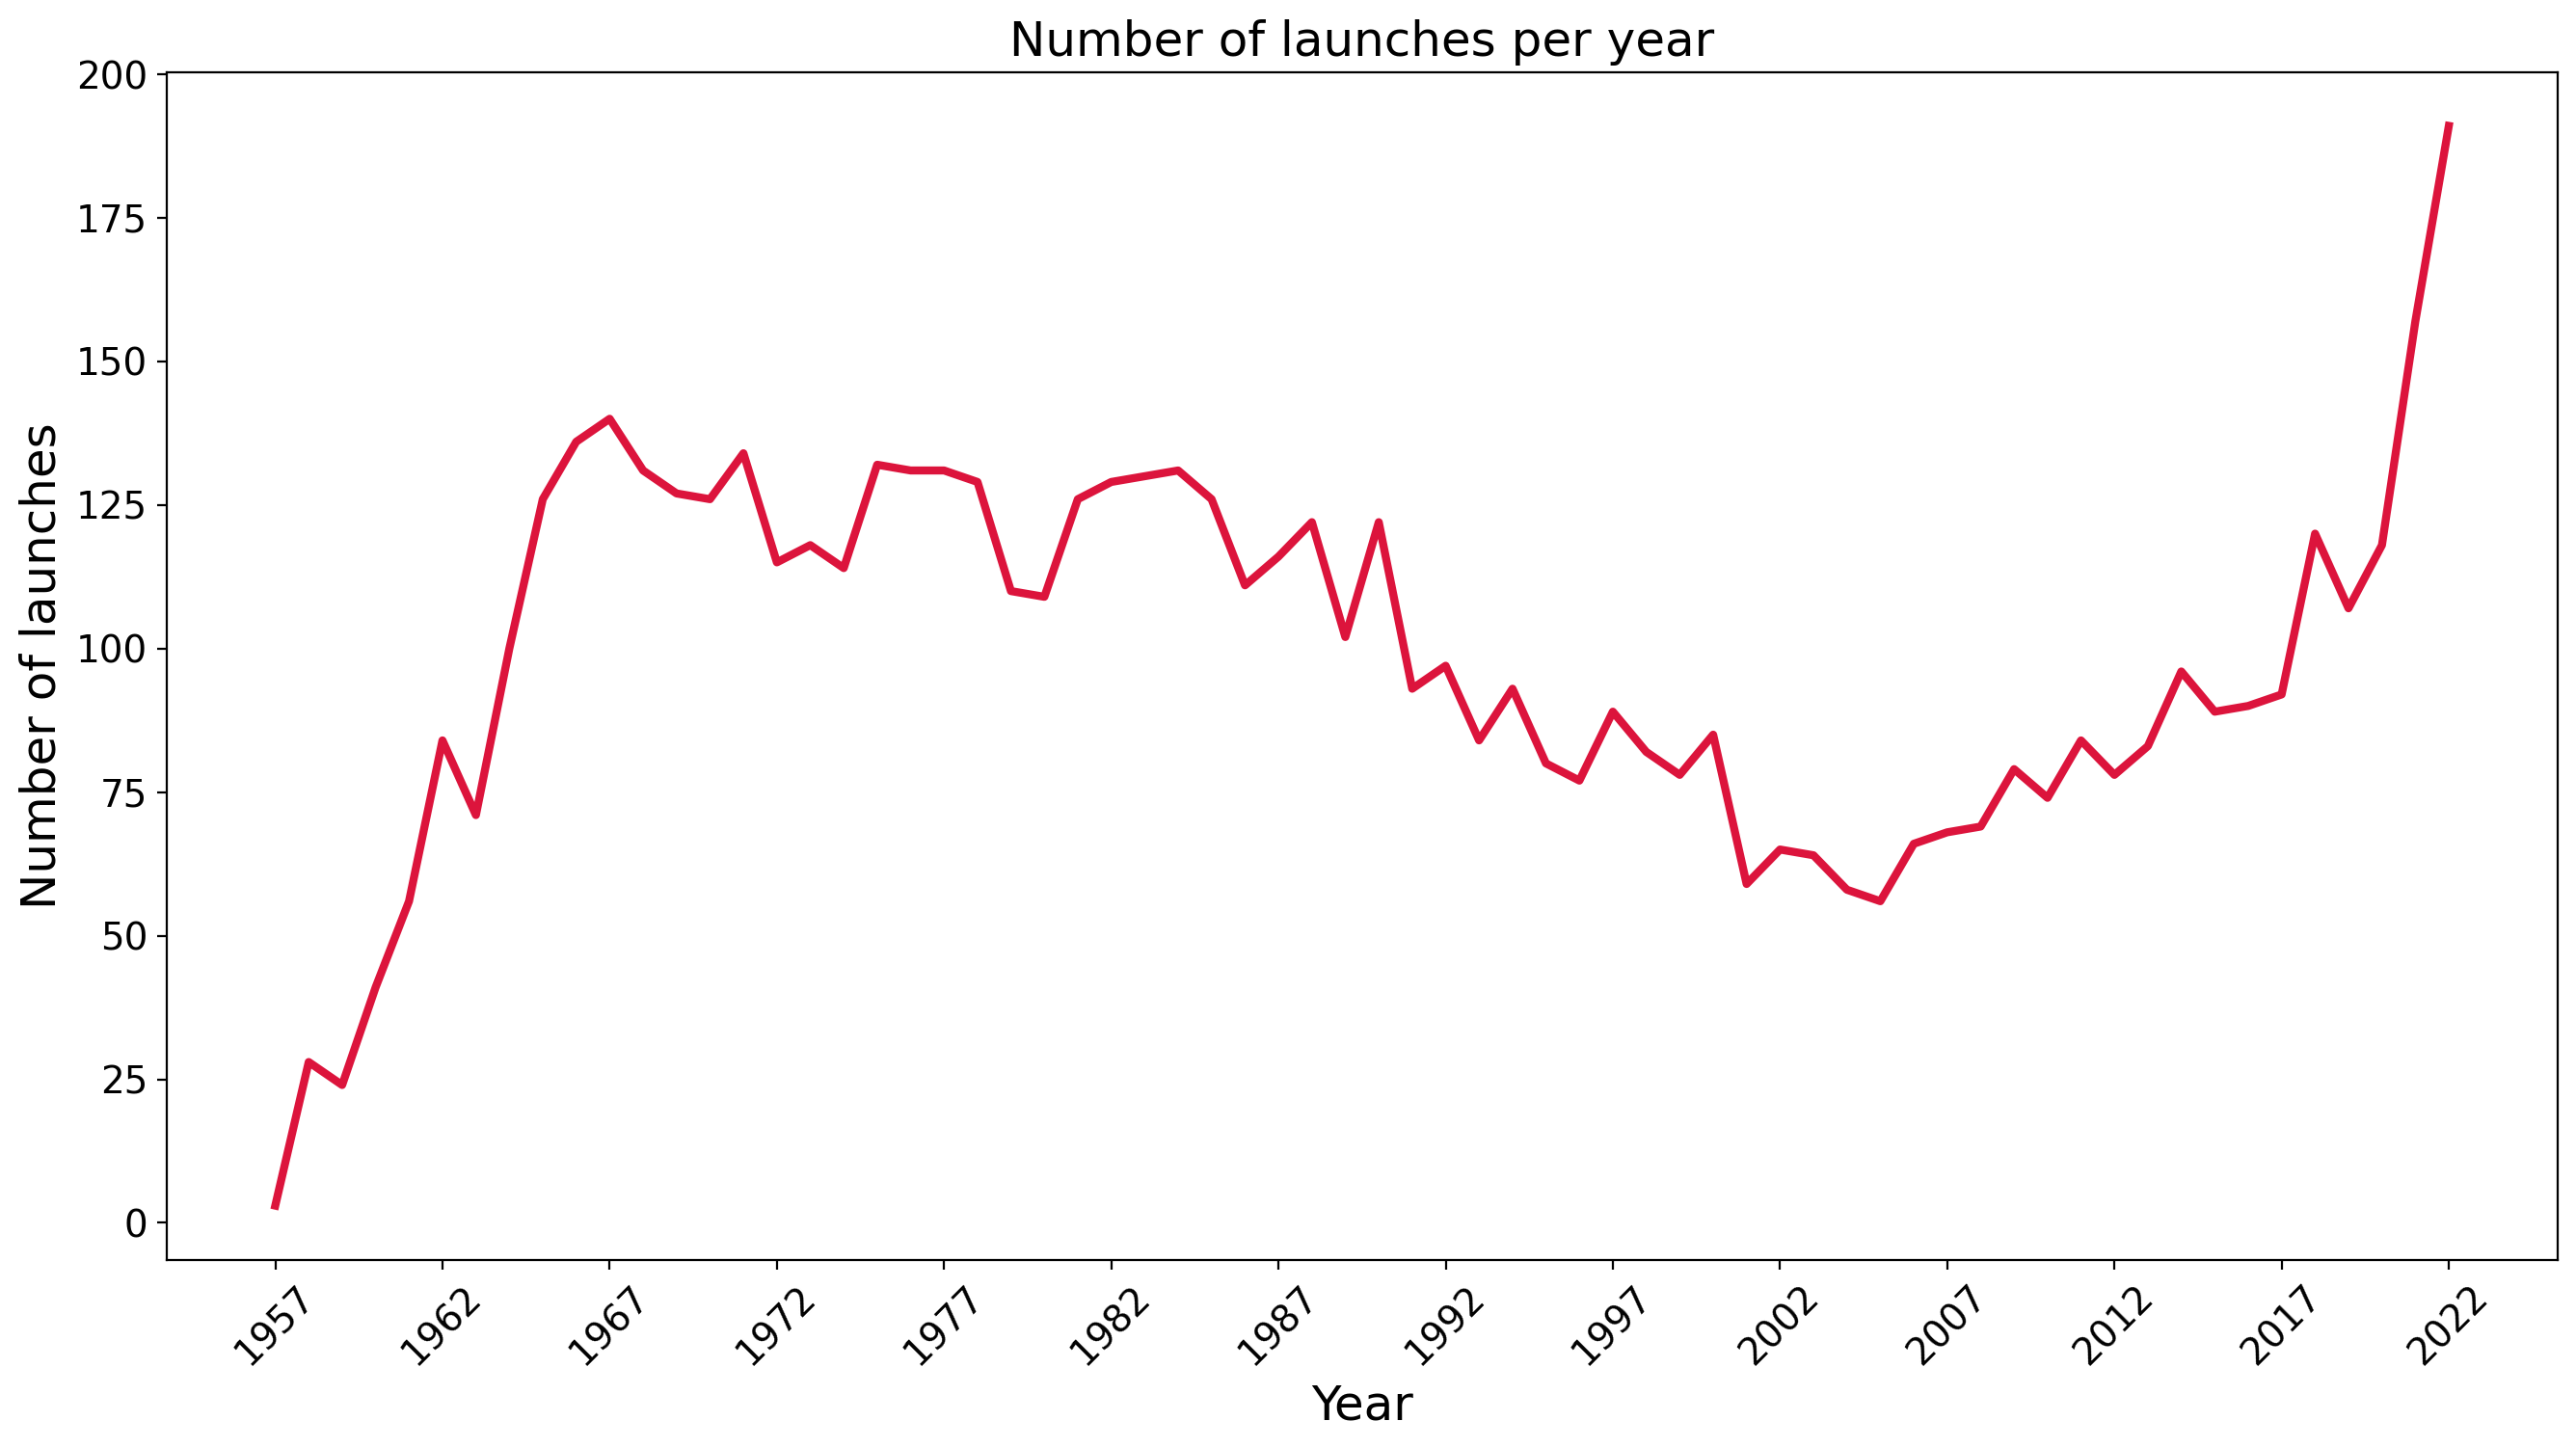

In [69]:
# [:-1] drops the incomplete 2023 from the data
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of launches per year', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(min(df_launches.Year), max(df_launches.Year), step=5), 
           fontsize=14, 
           rotation=45)

plt.xlabel("Year", fontsize=18)
plt.ylabel("Number of launches", fontsize=18)

plt.plot(df_launches.Year[:-1], 
         df_launches.Location[:-1], 
         c='crimson', 
         linewidth=3,)
 
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [71]:
df_data["Year_month"] = df_data.apply(lambda row: (datetime(row["Date"].year, row["Date"].month, 1)), axis=1)
df_data

Organisation                                           Location  \
0      Rocket Lab     Rocket Lab LC-1B, Māhia Peninsula, New Zealand   
1          SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
2            ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
3       Landspace    Site 96, Jiuquan Satellite Launch Center, China   
4          SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
...           ...                                                ...   
6557      US Navy           LC-18A, Cape Canaveral SFS, Florida, USA   
6558         ABMA           LC-26A, Cape Canaveral SFS, Florida, USA   
6559      US Navy           LC-18A, Cape Canaveral SFS, Florida, USA   
6560    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
6561    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

           Date                                  Detail Rocket_Status  Price  \
0    2023-07-18         Electron/Curie | Baby Come Back        Active   7.50   
1    2023-07-16  Falcon 9 Block 5 | Starlink Group 5-15        Active  67.00   
2    2023-07-14                   LVM-3 | Chandrayaan-3        Active  62.00   
3    2023-07-12                     ZhuQue-2 | Flight 2        Active    NaN   
4    2023-07-10   Falcon 9 Block 5 | Starlink Group 6-5        Active  67.00   
...         ...                                     ...           ...    ...   
6557 1958-02-05               Vanguard | Vanguard TV3BU       Retired    NaN   
6558 1958-02-01                     Juno I | Explorer 1       Retired    NaN   
6559 1957-12-06                 Vanguard | Vanguard TV3       Retired    NaN   
6560 1957-11-03              Sputnik 8K71PS | Sputnik 2       Retired    NaN   
6561 1957-10-04              Sputnik 8K71PS | Sputnik 1       Retired    NaN   

     Mission_Status Country  Date_temp  Year Year_month  
0           Success     NZL 2023-07-18  2023 2023-07-01  
1           Success     USA 2023-07-16  2023 2023-07-01  
2           Success     IND 2023-07-14  2023 2023-07-01  
3           Success     CHN 2023-07-12  2023 2023-07-01  
4           Success     USA 2023-07-10  2023 2023-07-01  
...             ...     ...        ...   ...        ...  
6557        Failure     USA 1958-02-05  1958 1958-02-01  
6558        Success     USA 1958-02-01  1958 1958-02-01  
6559        Failure     USA 1957-12-06  1957 1957-12-01  
6560        Success     KAZ 1957-11-03  1957 1957-11-01  
6561        Success     KAZ 1957-10-04  1957 1957-10-01  

[6562 rows x 11 columns]

In [73]:
df_launchesm = df_data.groupby(by=["Year_month"], as_index=False).agg({"Location": pd.Series.count})
df_launchesm

Year_month  Location
0   1957-10-01         1
1   1957-11-01         1
2   1957-12-01         1
3   1958-02-01         2
4   1958-03-01         3
..         ...       ...
781 2023-03-01        24
782 2023-04-01        13
783 2023-05-01        21
784 2023-06-01        15
785 2023-07-01         9

[786 rows x 2 columns]

In [82]:
roll_df = df_launchesm[['Location']].rolling(window=12).mean()

In [88]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

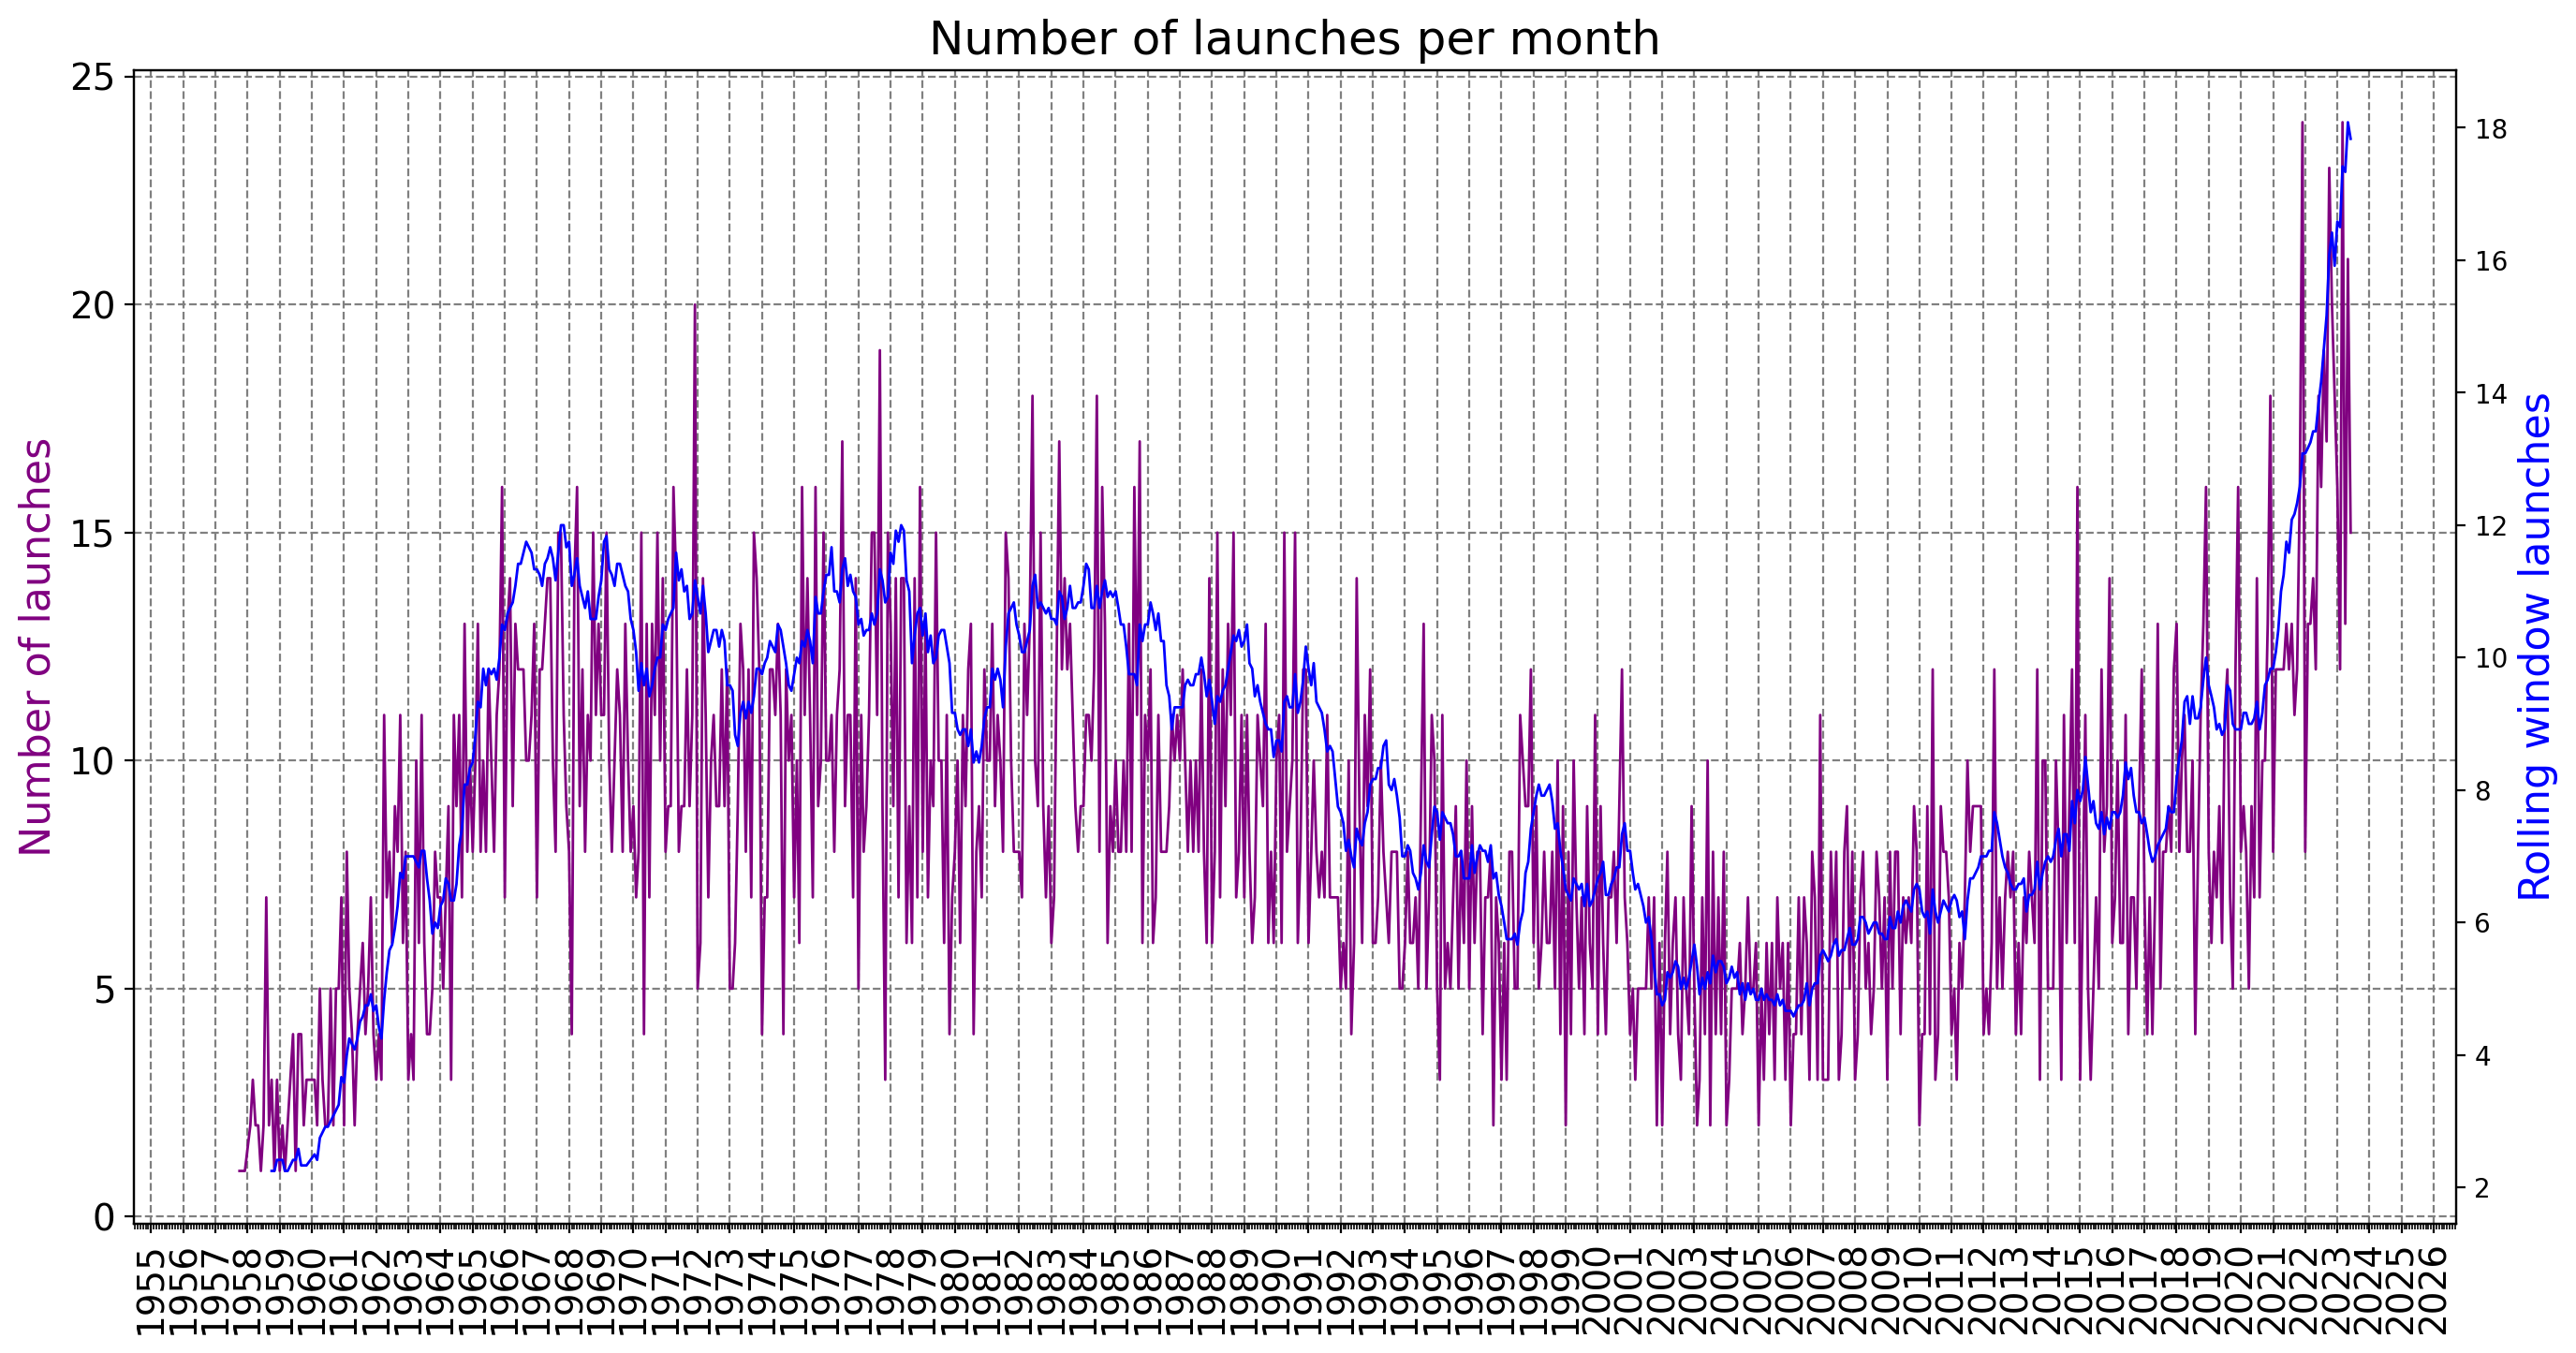

In [91]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of launches per month', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(
#     ticks=np.arange(min(df_launches.Year), max(df_launches.Year), step=5),
    fontsize=14,
    rotation=90)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Number of launches', color='purple', fontsize=16)
ax2.set_ylabel('Rolling window launches', color='blue', fontsize=16)

ax1.grid(color='grey', linestyle='--')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.xlabel("Year", fontsize=16)
# plt.ylabel("Number of launches", fontsize=18)

# plt.plot(df_launchesm.Year_month[:-1], 
#          df_launchesm.Location[:-1], 
#          c='crimson', 
#          linewidth=1,)

ax1.plot(df_launchesm.Year_month[:-1], df_launchesm.Location[:-1], 'purple', linewidth=1)
ax2.plot(df_launchesm.Year_month[:-1], roll_df.Location[:-1], 'blue', linewidth=1)
 
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [92]:
df_data["Month"] = df_data.apply(lambda row: (row["Date"].month), axis=1)
df_month = df_data.groupby(by=["Month"], as_index=False).agg({"Location": pd.Series.count})
df_month

Month  Location
0       1       395
1       2       487
2       3       517
3       4       571
4       5       535
5       6       599
6       7       542
7       8       560
8       9       567
9      10       588
10     11       518
11     12       683

In [94]:
bar_month = px.bar(x = df_month.Month,
                   y = df_month.Location,
                   title='Launches per month')
 
bar_month.update_layout(xaxis_title='Month',
                        yaxis_title='Number of Launches')
bar_month.show()

In [ ]:
# It's difficut to see whether there is a preferance for particular months. December is a clear winner whereas January
# is a clear loser. Apart from that there differentiation is not very pronounced

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [103]:
df_price_m = df_price.groupby(by=["Year_month"], as_index=False).agg({"Location": pd.Series.count, "Price": pd.Series.mean})
df_price_m
# this dataframe contants an average price per launch per month. The average cost per year paints somewhat similar picture
# As before, the source of this is the dataframe from which all the records with missing prices were removed

Year_month  Location  Price
0   1964-09-01         1  63.23
1   1964-12-01         1  63.23
2   1965-02-01         1  63.23
3   1965-05-01         1  63.23
4   1966-07-01         1  59.00
..         ...       ...    ...
585 2023-03-01        22  44.89
586 2023-04-01         9  76.41
587 2023-05-01        16  49.71
588 2023-06-01        13  69.70
589 2023-07-01         8  71.04

[590 rows x 3 columns]

In [104]:
df_pm_roll = df_price_m[['Price']].rolling(window=12).mean()
df_pm_roll

Price
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
..     ...
585  55.58
586  57.95
587  58.20
588  59.48
589  61.03

[590 rows x 1 columns]

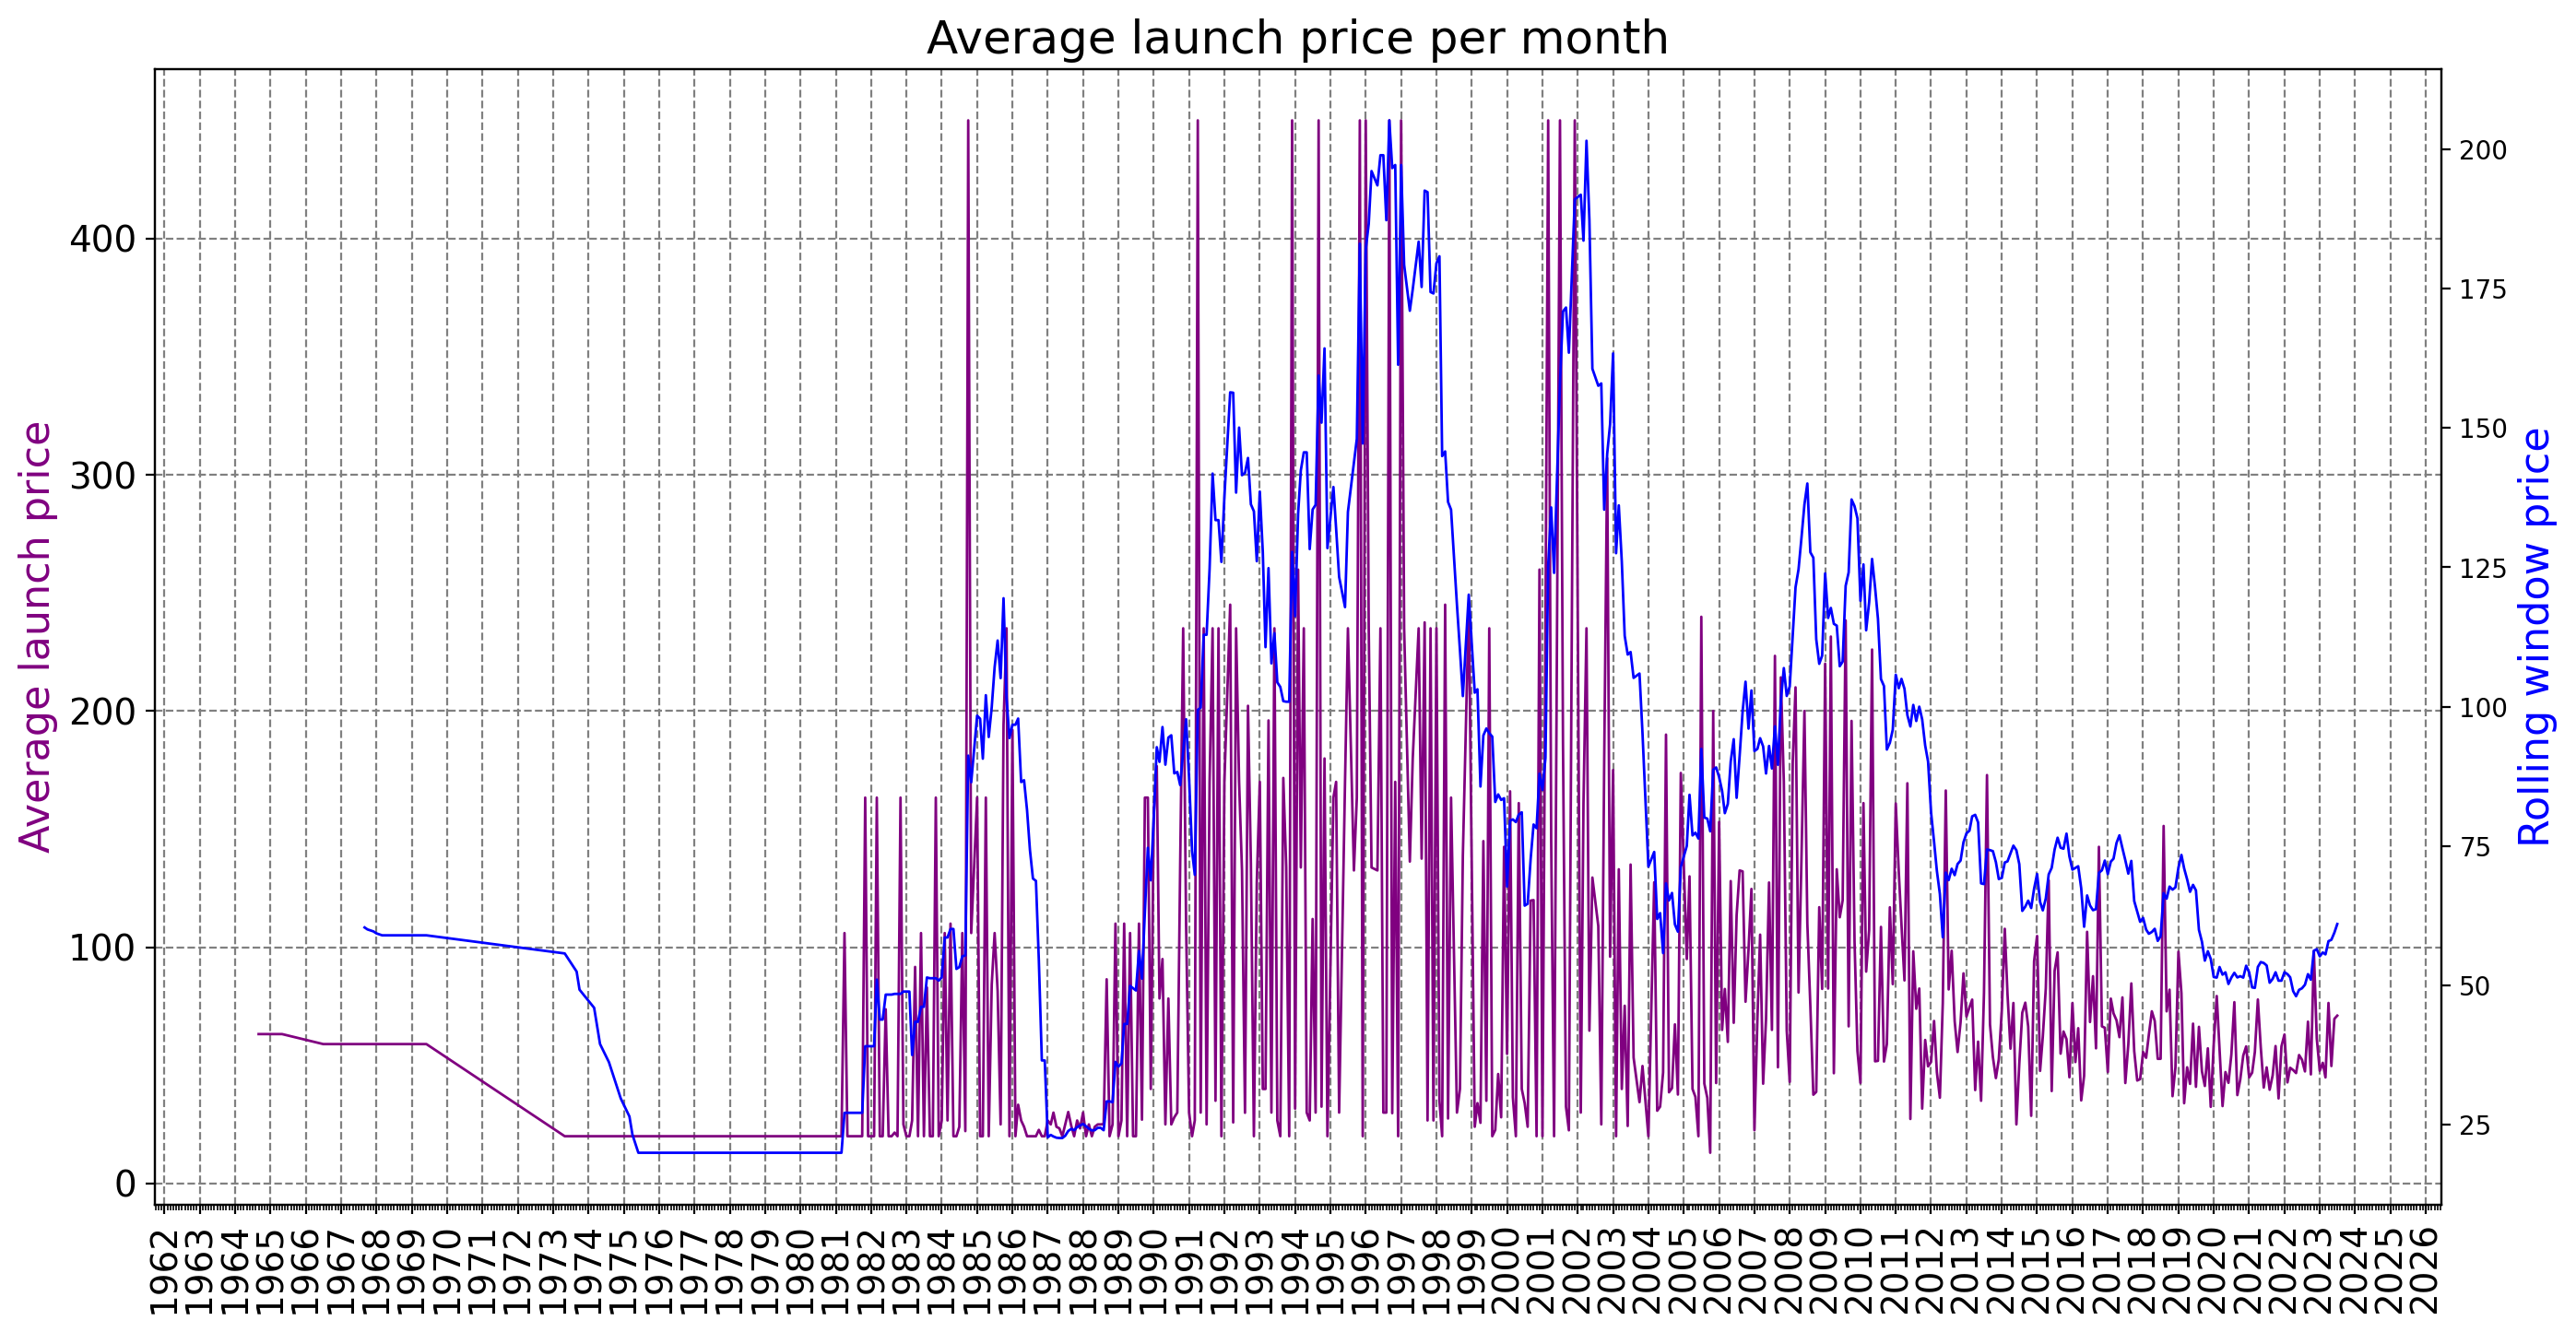

In [105]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Average launch price per month', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(
#     ticks=np.arange(min(df_launches.Year), max(df_launches.Year), step=5),
    fontsize=14,
    rotation=90)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Average launch price', color='purple', fontsize=16)
ax2.set_ylabel('Rolling window price', color='blue', fontsize=16)

ax1.grid(color='grey', linestyle='--')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.xlabel("Year", fontsize=16)

ax1.plot(df_price_m.Year_month, df_price_m.Price, 'purple', linewidth=1)
ax2.plot(df_price_m.Year_month, df_pm_roll.Price, 'blue', linewidth=1)
 
plt.show()

In [ ]:
# The cost increase in early 1980's, then went down towards the end of the decade, then exploded in 1990's and early 2000's.
# After that the cost dropped significantly with a small increase around the late 2000's 
# There can be a multitude of reasons for this including the quality of the data and data collection as well as 
# potential variety in cost per country/organization and other considerations (e.g. collapse of Soviet Union)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [132]:
top_ten = df_org.index[:10].tolist()
# top_ten
df_topten = df_data[(df_data["Organisation"].isin(top_ten)) & (df_data["Mission_Status"] == "Success")]
df_topten

Organisation                                           Location  \
1           SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
4           SpaceX           SLC-40, Cape Canaveral SFS, Florida, USA   
5             CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
6           SpaceX            SLC-4E, Vandenberg SFB, California, USA   
7      Arianespace  ELA-3, Guiana Space Centre, French Guiana, France   
...            ...                                                ...   
6526  US Air Force   SLC-1W (75-3-4), Vandenberg SFB, California, USA   
6531  US Air Force            LC-11, Cape Canaveral SFS, Florida, USA   
6551     RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
6560     RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
6561     RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

           Date                                            Detail  \
1    2023-07-16            Falcon 9 Block 5 | Starlink Group 5-15   
4    2023-07-10             Falcon 9 Block 5 | Starlink Group 6-5   
5    2023-07-09  Long March 2C/YZ-1S | 2 x SatNet test satellites   
6    2023-07-07            Falcon 9 Block 5 | Starlink Group 5-13   
7    2023-07-05       Ariane 5 ECA | Syracuse 4B & Heinrich Hertz   
...         ...                                               ...   
6526 1959-04-13                  Thor-DM18 Agena-A | Discoverer 2   
6531 1958-12-18                              SM-65B Atlas | SCORE   
6551 1958-05-15                          Sputnik 8A91 | Sputnik 3   
6560 1957-11-03                        Sputnik 8K71PS | Sputnik 2   
6561 1957-10-04                        Sputnik 8K71PS | Sputnik 1   

     Rocket_Status  Price Mission_Status Country  Date_temp  Year Year_month  \
1           Active  67.00        Success     USA 2023-07-16  2023 2023-07-01   
4           Active  67.00        Success     USA 2023-07-10  2023 2023-07-01   
5           Active  30.80        Success     CHN 2023-07-09  2023 2023-07-01   
6           Active  67.00        Success     USA 2023-07-07  2023 2023-07-01   
7          Retired 200.00        Success     FRA 2023-07-05  2023 2023-07-01   
...            ...    ...            ...     ...        ...   ...        ...   
6526       Retired    NaN        Success     USA 1959-04-13  1959 1959-04-01   
6531       Retired    NaN        Success     USA 1958-12-18  1958 1958-12-01   
6551       Retired    NaN        Success     KAZ 1958-05-15  1958 1958-05-01   
6560       Retired    NaN        Success     KAZ 1957-11-03  1957 1957-11-01   
6561       Retired    NaN        Success     KAZ 1957-10-04  1957 1957-10-01   

      Month  
1         7  
4         7  
5         7  
6         7  
7         7  
...     ...  
6526      4  
6531     12  
6551      5  
6560     11  
6561     10  

[4990 rows x 12 columns]

In [134]:
df_topten_dev = pd.pivot_table(df_topten, values='Mission_Status', index='Year', columns=['Organisation'], aggfunc='count')
df_topten_dev

Organisation  Arianespace  CASC  General Dynamics  NASA  RVSN USSR  Roscosmos  \
Year                                                                            
1957                  NaN   NaN               NaN   NaN       2.00        NaN   
1958                  NaN   NaN               NaN   NaN       1.00        NaN   
1959                  NaN   NaN               NaN   NaN       2.00        NaN   
1960                  NaN   NaN              1.00  1.00       3.00        NaN   
1961                  NaN   NaN              2.00  9.00       5.00        NaN   
...                   ...   ...               ...   ...        ...        ...   
2019                 8.00 26.00               NaN   NaN        NaN      13.00   
2020                 6.00 32.00               NaN   NaN        NaN       5.00   
2021                 7.00 48.00               NaN   NaN        NaN       9.00   
2022                 4.00 54.00               NaN  1.00        NaN       8.00   
2023                 2.00 20.00               NaN   NaN        NaN       6.00   

Organisation  SpaceX  ULA  US Air Force  VKS RF  
Year                                             
1957             NaN  NaN           NaN     NaN  
1958             NaN  NaN          1.00     NaN  
1959             NaN  NaN          5.00     NaN  
1960             NaN  NaN         14.00     NaN  
1961             NaN  NaN         17.00     NaN  
...              ...  ...           ...     ...  
2019           13.00 5.00           NaN    8.00  
2020           26.00 6.00           NaN    7.00  
2021           32.00 5.00           NaN    4.00  
2022           61.00 8.00           NaN   13.00  
2023           47.00 1.00           NaN    3.00  

[67 rows x 10 columns]

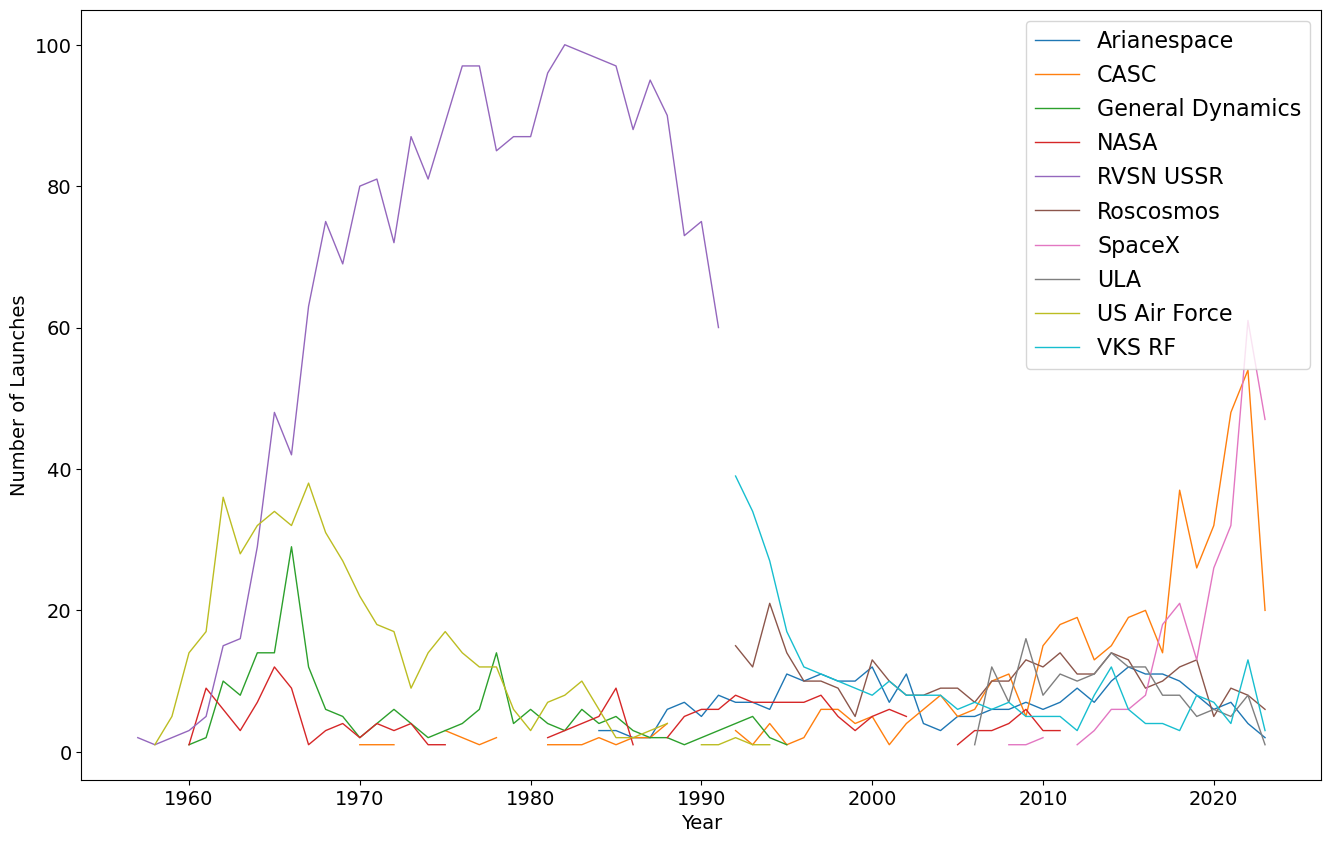

In [135]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
for column in df_topten_dev.columns:
    plt.plot(df_topten_dev.index, df_topten_dev[column], linewidth=1, label=df_topten_dev[column].name)

plt.legend(fontsize=16)

In [ ]:
# RVSN USSR dominated the number of launches up until 1991. US Airforce had a (relatively) significant number of launches
# in the 1960's which then gradually went down after that.
# In the recent years there is a significant surge in the number of launches by SpaceX and CASC (Chinese aerospace agency)
# Filtering for only successful launches does not change the overall picture

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [138]:
# df_failuresp.index.tolist()
df_coldwar = df_data[(df_data["Country"].isin(["KAZ", "RUS", "USA"])) & (df_data["Year"] < 1992)]
df_coldwar.loc[df_coldwar["Country"] == "KAZ", "Country"] = "RUS"
df_coldwar

Organisation                                      Location  \
2839         RVSN USSR  Site 175/58, Baikonur Cosmodrome, Kazakhstan   
2840         RVSN USSR   Site 81/23, Baikonur Cosmodrome, Kazakhstan   
2841         RVSN USSR        Site 32/2, Plesetsk Cosmodrome, Russia   
2842         RVSN USSR    Site 31/6, Baikonur Cosmodrome, Kazakhstan   
2844  General Dynamics     SLC-36B, Cape Canaveral SFS, Florida, USA   
...                ...                                           ...   
6557           US Navy      LC-18A, Cape Canaveral SFS, Florida, USA   
6558              ABMA      LC-26A, Cape Canaveral SFS, Florida, USA   
6559           US Navy      LC-18A, Cape Canaveral SFS, Florida, USA   
6560         RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
6561         RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   

           Date                                 Detail Rocket_Status  Price  \
2839 1991-12-20         Rokot/Briz K | GVM Demo Flight       Retired    NaN   
2840 1991-12-19        Proton K/Block-DM-2 | Raduga 28       Retired    NaN   
2841 1991-12-18  Tsyklon-3 | Intercosmos 25 & Magion 3       Retired    NaN   
2842 1991-12-17                  Soyuz U | Cosmos 2174       Retired  20.00   
2844 1991-12-07                Atlas II | Eutelsat 2F3       Retired    NaN   
...         ...                                    ...           ...    ...   
6557 1958-02-05              Vanguard | Vanguard TV3BU       Retired    NaN   
6558 1958-02-01                    Juno I | Explorer 1       Retired    NaN   
6559 1957-12-06                Vanguard | Vanguard TV3       Retired    NaN   
6560 1957-11-03             Sputnik 8K71PS | Sputnik 2       Retired    NaN   
6561 1957-10-04             Sputnik 8K71PS | Sputnik 1       Retired    NaN   

     Mission_Status Country  Date_temp  Year Year_month  Month  
2839        Success     RUS 1991-12-20  1991 1991-12-01     12  
2840        Success     RUS 1991-12-19  1991 1991-12-01     12  
2841        Success     RUS 1991-12-18  1991 1991-12-01     12  
2842        Success     RUS 1991-12-17  1991 1991-12-01     12  
2844        Success     USA 1991-12-07  1991 1991-12-01     12  
...             ...     ...        ...   ...        ...    ...  
6557        Failure     USA 1958-02-05  1958 1958-02-01      2  
6558        Success     USA 1958-02-01  1958 1958-02-01      2  
6559        Failure     USA 1957-12-06  1957 1957-12-01     12  
6560        Success     RUS 1957-11-03  1957 1957-11-01     11  
6561        Success     RUS 1957-10-04  1957 1957-10-01     10  

[3553 rows x 12 columns]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [140]:
# df_cwtl = df_data[['Organisation', 'Location']].groupby(['Organisation']).count()
df_cwtl = df_coldwar.groupby(by=["Country"], as_index=False).agg({"Location": pd.Series.count})
df_cwtl

Country  Location
0     RUS      2478
1     USA      1075

In [141]:
fig = px.pie(labels=df_cwtl.Country, values=df_cwtl.Location, names=df_cwtl.Country, hole=0.6)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [142]:
df_cwtl_y = pd.pivot_table(df_coldwar, values='Mission_Status', index='Year', columns=['Country'], aggfunc='count')
df_cwtl_y

Country  RUS  USA
Year             
1957       2    1
1958       5   23
1959       4   20
1960       9   32
1961       9   47
1962      22   62
1963      24   47
1964      36   64
1965      54   71
1966      54   79
1967      75   60
1968      82   48
1969      84   41
1970      89   29
1971      92   33
1972      80   32
1973      91   25
1974      86   23
1975      93   30
1976     100   26
1977     102   26
1978      91   33
1979      89   16
1980      90   15
1981     100   19
1982     108   18
1983     101   22
1984      99   22
1985     101   18
1986      95    9
1987      99    9
1988      95   11
1989      75   18
1990      80   27
1991      62   19

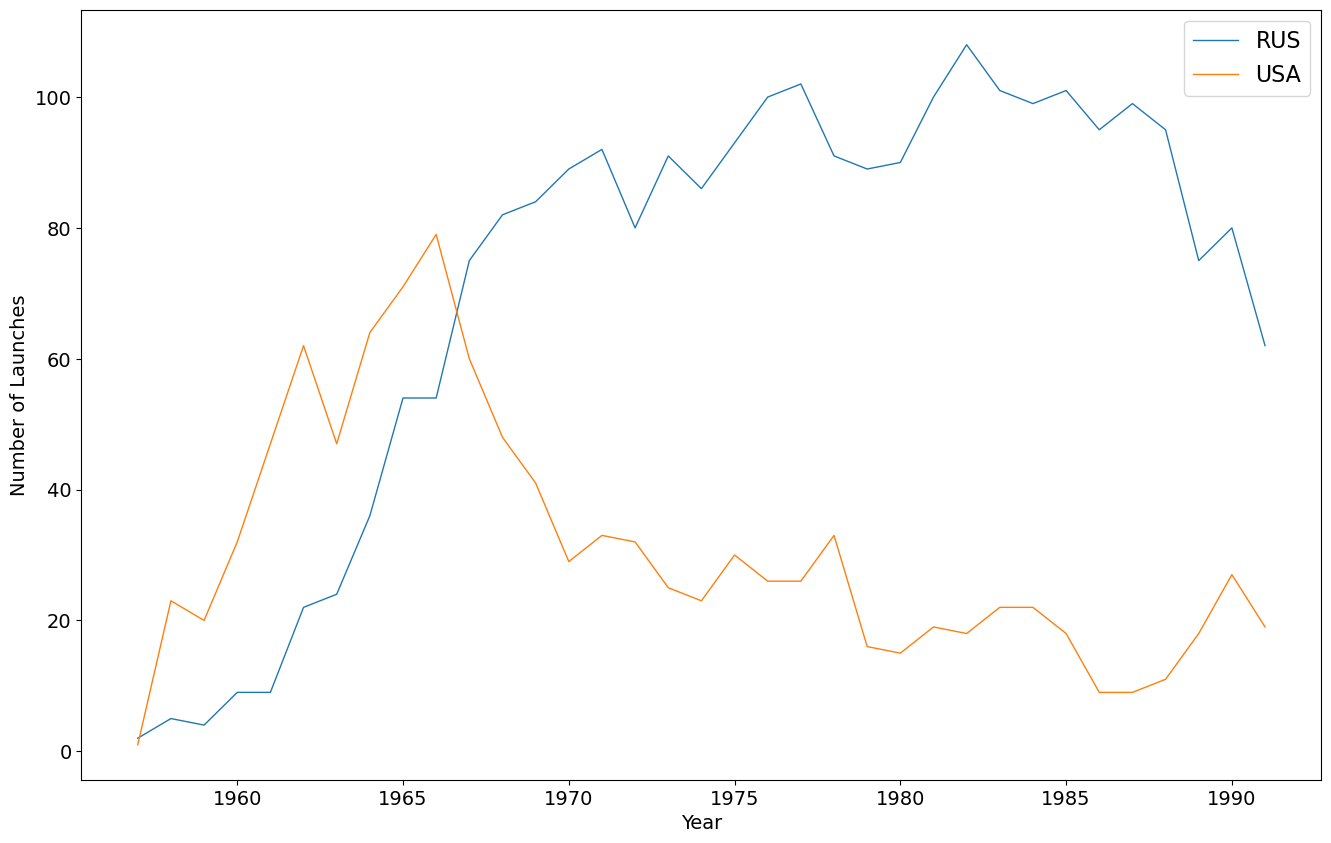

In [143]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
for column in df_cwtl_y.columns:
    plt.plot(df_cwtl_y.index, df_cwtl_y[column], linewidth=1, label=df_cwtl_y[column].name)

plt.legend(fontsize=16)

## Chart the Total Number of Mission Failures Year on Year.

In [157]:
# df_cwtl_r = df_cwtl[df_cwtl["Country"] == "RUS"]
# df_cwtl_u = df_cwtl[df_cwtl["Country"] == "USA"]
df_cwtl_r = pd.pivot_table(df_coldwar[df_coldwar["Country"] == "RUS"], values='Detail', index='Year', columns=['Mission_Status'], aggfunc='count')
df_cwtl_u = pd.pivot_table(df_coldwar[df_coldwar["Country"] == "USA"], values='Detail', index='Year', columns=['Mission_Status'], aggfunc='count')
df_cwtl_u["Prelaunch Failure"] = 0
df_cwtl_r.fillna(0, inplace=True)
df_cwtl_u.fillna(0, inplace=True)
df_cwtl_r["Failure_Rate"] = df_cwtl_r.apply(lambda row: fail_rate(row), axis=1)
df_cwtl_u["Failure_Rate"] = df_cwtl_u.apply(lambda row: fail_rate(row), axis=1)

def fail_total(row):
    total_failures = row["Failure"] + row["Partial Failure"] + row["Prelaunch Failure"]
    
    return total_failures

df_cwtl_r["Total_Failures"] = df_cwtl_r.apply(lambda row: fail_total(row), axis=1)
df_cwtl_u["Total_Failures"] = df_cwtl_u.apply(lambda row: fail_total(row), axis=1)

df_cwtl_u

Mission_Status  Failure  Partial Failure  Success  Prelaunch Failure  \
Year                                                                   
1957               1.00             0.00     0.00                  0   
1958              16.00             2.00     5.00                  0   
1959              10.00             2.00     8.00                  0   
1960              15.00             0.00    17.00                  0   
1961              15.00             3.00    29.00                  0   
1962               8.00             2.00    52.00                  0   
1963               8.00             0.00    39.00                  0   
1964               8.00             3.00    53.00                  0   
1965               8.00             2.00    61.00                  0   
1966               4.00             3.00    72.00                  0   
1967               3.00             3.00    54.00                  0   
1968               3.00             3.00    42.00                  0   
1969               2.00             1.00    38.00                  0   
1970               1.00             1.00    27.00                  0   
1971               3.00             0.00    30.00                  0   
1972               2.00             0.00    30.00                  0   
1973               2.00             0.00    23.00                  0   
1974               2.00             0.00    21.00                  0   
1975               3.00             0.00    27.00                  0   
1976               1.00             0.00    25.00                  0   
1977               2.00             1.00    23.00                  0   
1978               1.00             0.00    32.00                  0   
1979               0.00             0.00    16.00                  0   
1980               3.00             0.00    12.00                  0   
1981               1.00             1.00    17.00                  0   
1982               0.00             0.00    18.00                  0   
1983               0.00             0.00    22.00                  0   
1984               1.00             0.00    21.00                  0   
1985               1.00             0.00    17.00                  0   
1986               3.00             0.00     6.00                  0   
1987               1.00             0.00     8.00                  0   
1988               0.00             1.00    10.00                  0   
1989               0.00             0.00    18.00                  0   
1990               1.00             0.00    26.00                  0   
1991               1.00             1.00    17.00                  0   

Mission_Status  Failure_Rate  Total_Failures  
Year                                          
1957                    1.00            1.00  
1958                    0.78           18.00  
1959                    0.60           12.00  
1960                    0.47           15.00  
1961                    0.38           18.00  
1962                    0.16           10.00  
1963                    0.17            8.00  
1964                    0.17           11.00  
1965                    0.14           10.00  
1966                    0.09            7.00  
1967                    0.10            6.00  
1968                    0.12            6.00  
1969                    0.07            3.00  
1970                    0.07            2.00  
1971                    0.09            3.00  
1972                    0.06            2.00  
1973                    0.08            2.00  
1974                    0.09            2.00  
1975                    0.10            3.00  
1976                    0.04            1.00  
1977                    0.12            3.00  
1978                    0.03            1.00  
1979                    0.00            0.00  
1980                    0.20            3.00  
1981                    0.11            2.00  
1982                    0.00            0.00  
1983               

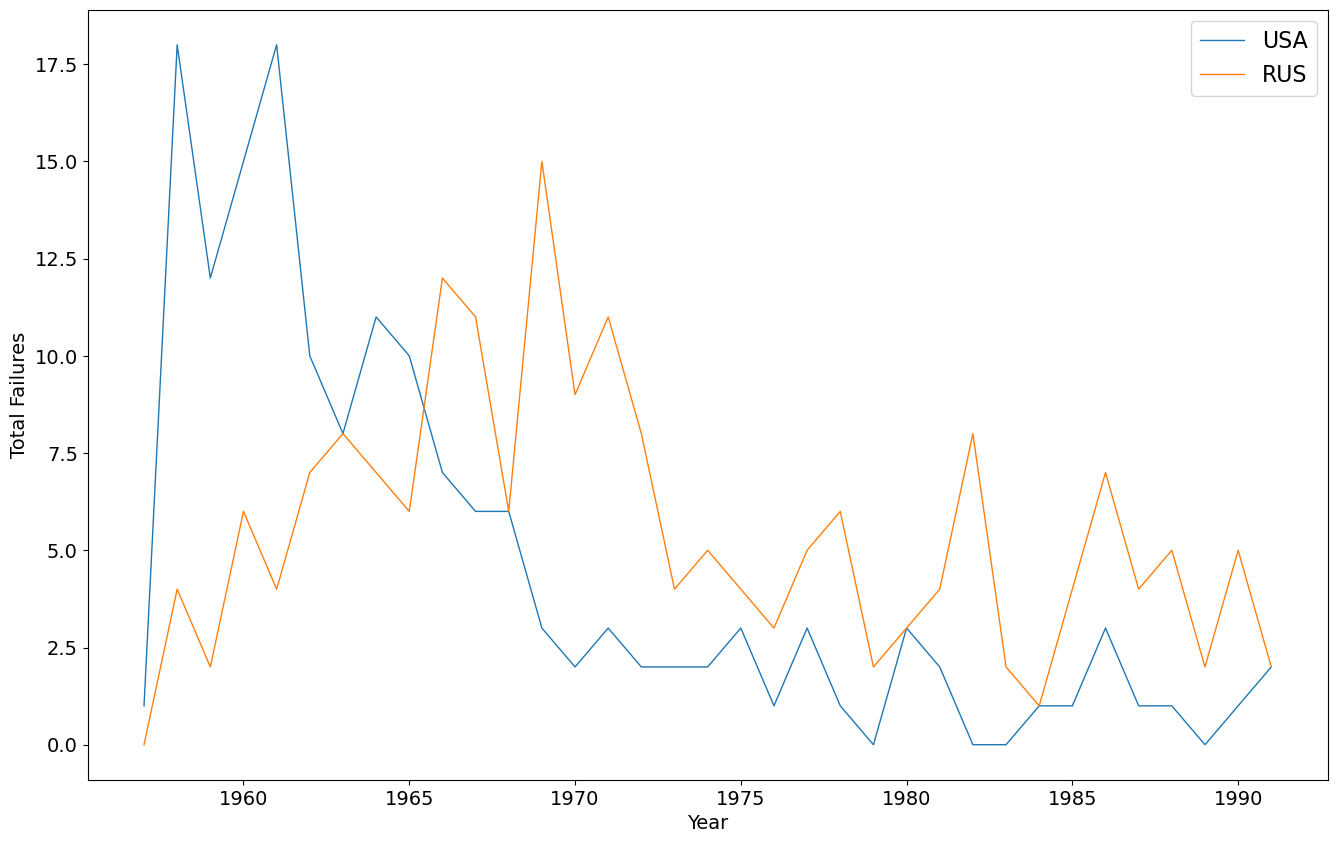

In [159]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Failures', fontsize=14)

plt.plot(df_cwtl_u.index, df_cwtl_u["Total_Failures"], linewidth=1, label="USA")
plt.plot(df_cwtl_u.index, df_cwtl_r["Total_Failures"], linewidth=1, label="RUS")

plt.legend(fontsize=16)

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

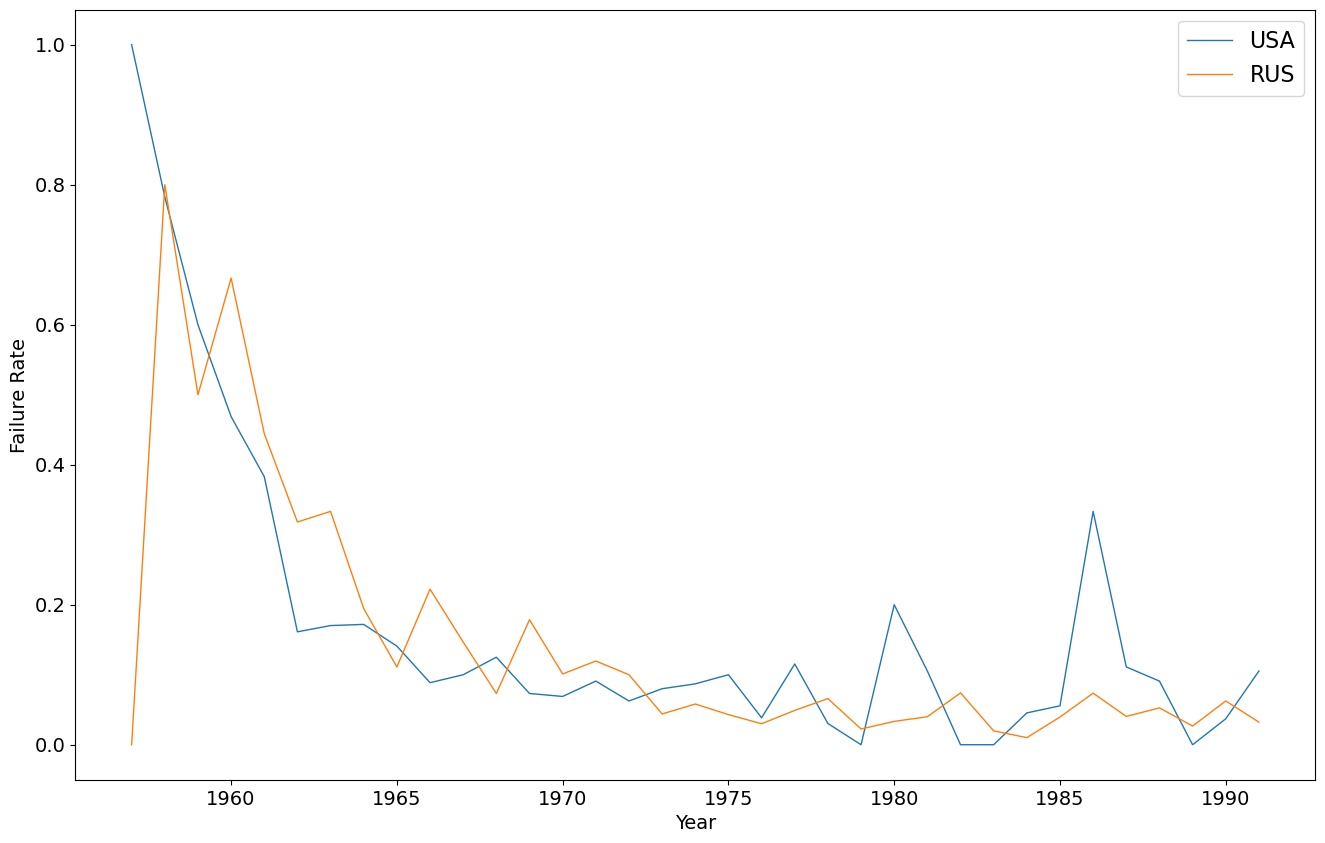

In [161]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Failure Rate', fontsize=14)

plt.plot(df_cwtl_u.index, df_cwtl_u["Failure_Rate"], linewidth=1, label="USA")
plt.plot(df_cwtl_u.index, df_cwtl_r["Failure_Rate"], linewidth=1, label="RUS")

plt.legend(fontsize=16)

In [ ]:
# Significant number of failures at the beginning of the space race which went down over the years.
# The failure rate is remarkably similar, except at the very beginning of the space race.
# The biggest question is of course the quality of data, particularly in the early years

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [164]:
df_country = pd.pivot_table(df_data, values='Mission_Status', index='Year', columns=['Country'], aggfunc='count')
df_country.fillna(0, inplace=True)
df_country["Max_Country"] = df_country.idxmax(axis=1)
df_country["Max_Country"]

Country  AUS  BRA   CHN  FRA  GBR  IND  IRN  ISR  JPN   KAZ  KEN  KOR  MHL  \
Year                                                                         
1957    0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00  2.00 0.00 0.00 0.00   
1958    0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00  5.00 0.00 0.00 0.00   
1959    0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00  4.00 0.00 0.00 0.00   
1960    0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00  9.00 0.00 0.00 0.00   
1961    0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00  7.00 0.00 0.00 0.00   
...      ...  ...   ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   
2019    0.00 0.00 34.00 9.00 0.00 6.00 3.00 0.00 2.00 13.00 0.00 0.00 0.00   
2020    0.00 0.00 39.00 7.00 0.00 2.00 2.00 1.00 4.00  7.00 0.00 0.00 0.00   
2021    0.00 0.00 55.00 7.00 0.00 2.00 2.00 0.00 3.00 14.00 0.00 1.00 0.00   
2022    0.00 0.00 64.00 6.00 0.00 5.00 2.00 0.00 1.00  7.00 0.00 1.00 0.00   
2023    0.00 0.00 27.00 2.00 1.00 5.00 0.00 1.00 2.00  5.00 0.00 1.00 0.00   

Country  NZL  PRK   RUS   USA Max_Country  
Year                                       
1957    0.00 0.00  0.00  1.00         KAZ  
1958    0.00 0.00  0.00 23.00         USA  
1959    0.00 0.00  0.00 20.00         USA  
1960    0.00 0.00  0.00 32.00         USA  
1961    0.00 0.00  2.00 47.00         USA  
...      ...  ...   ...   ...         ...  
2019    6.00 0.00  9.00 25.00         CHN  
2020    7.00 0.00  8.00 41.00         USA  
2021    6.00 0.00 10.00 57.00         USA  
2022    9.00 0.00 14.00 82.00         USA  
2023    4.00 1.00  4.00 57.00         USA  

[67 rows x 18 columns]

In [166]:
df_countrys = pd.pivot_table(df_data[df_data["Mission_Status"] == "Success"], values='Mission_Status', index='Year', columns=['Country'], aggfunc='count')
df_countrys.fillna(0, inplace=True)
df_countrys["Max_Country"] = df_countrys.idxmax(axis=1)
df_countrys["Max_Country"]

Year
1957    KAZ
1958    USA
1959    USA
1960    USA
1961    USA
       ... 
2019    CHN
2020    USA
2021    CHN
2022    USA
2023    USA
Name: Max_Country, Length: 67, dtype: object

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [167]:
df_orgm = pd.pivot_table(df_data, values='Mission_Status', index='Year', columns=['Organisation'], aggfunc='count')
df_orgm.fillna(0, inplace=True)
df_orgm["Max_Org"] = df_orgm.idxmax(axis=1)
df_orgm["Max_Org"]

Year
1957       RVSN USSR
1958         US Navy
1959    US Air Force
1960    US Air Force
1961    US Air Force
            ...     
2019            CASC
2020            CASC
2021            CASC
2022          SpaceX
2023          SpaceX
Name: Max_Org, Length: 67, dtype: object

In [178]:
df_orgm[df_orgm.index.isin(range(1970, 1980))]["Max_Org"]

Year
1970    RVSN USSR
1971    RVSN USSR
1972    RVSN USSR
1973    RVSN USSR
1974    RVSN USSR
1975    RVSN USSR
1976    RVSN USSR
1977    RVSN USSR
1978    RVSN USSR
1979    RVSN USSR
Name: Max_Org, dtype: object

In [176]:
df_orgm[df_orgm.index.isin(range(1980, 1990))]["Max_Org"]

Year
1980    RVSN USSR
1981    RVSN USSR
1982    RVSN USSR
1983    RVSN USSR
1984    RVSN USSR
1985    RVSN USSR
1986    RVSN USSR
1987    RVSN USSR
1988    RVSN USSR
1989    RVSN USSR
Name: Max_Org, dtype: object

In [ ]:
# In 1970's and 1980's the RVSN USSR dominated the number of launches
# In the late 2010's, 2020, and 2021 the CASC (the Chinese aerospace agency) dominated the launches
# In 2022 and 2023 SpaceX is dominating the number of launchs (although the 2023 is not complete yet)